In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 144

In [112]:
vectors = pd.read_csv('vec.csv')

In [113]:
vector_coords = vectors[(vectors.type == "vector") & (vectors.name == "posX:vector")]

In [114]:
def string_of_floats_to_list_of_floats(string, separator):
    return [float(n) for n in string.split(separator)]

In [115]:
x = string_of_floats_to_list_of_floats(vector_coords.iloc[[0]].vectime.values[0], ' ')

In [116]:
y = []

for t in x:
    tmp = 0
    for v in range(len(vector_coords)):
        times = string_of_floats_to_list_of_floats(vector_coords.iloc[[v]].vectime.values[0], ' ')
        if t in times:
            tmp += 1
    y.append(tmp)

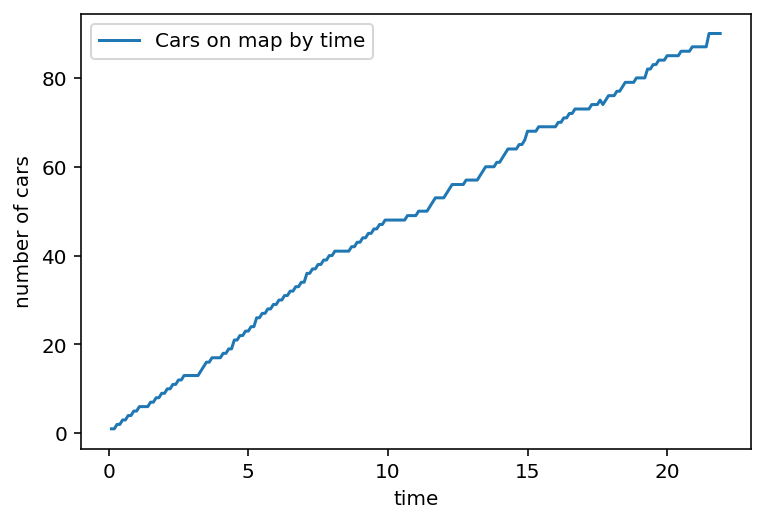

In [117]:
plt.plot(x,y, label="Cars on map by time")
plt.xlabel("time")
plt.ylabel("number of cars")
plt.legend()

In [118]:
car0 = vectors[(vectors.type == "vector") & (vectors.name == "allDetectedCars")].iloc[[0]]

In [119]:
x = string_of_floats_to_list_of_floats(car0.vectime.values[0], ' ')

In [120]:
y = string_of_floats_to_list_of_floats(car0.vecvalue.values[0], ' ')

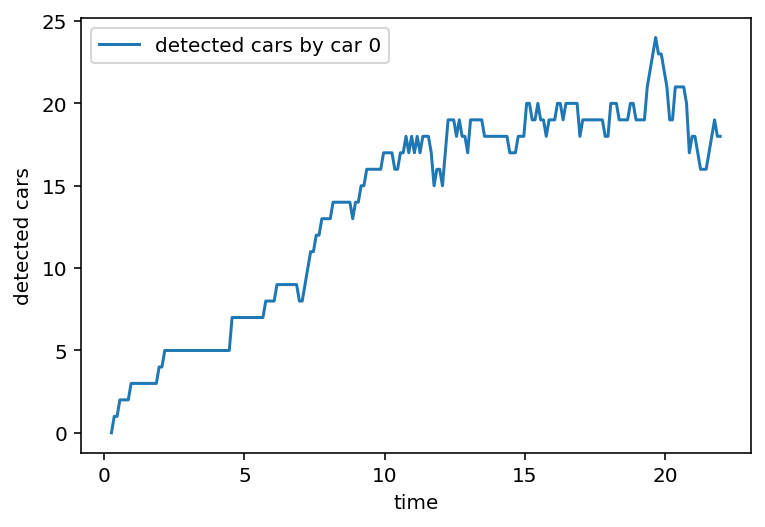

In [121]:
plt.plot(x,y, label="detected cars by car 0")
plt.xlabel("time")
plt.ylabel("detected cars")
plt.legend()

In [122]:
cbr0 = vectors[(vectors.type == "vector") & (vectors.name == "CBR.VanetRx")].iloc[[0]]

In [123]:
x = string_of_floats_to_list_of_floats(cbr0.vectime.values[0], ' ')

In [124]:
y = string_of_floats_to_list_of_floats(cbr0.vecvalue.values[0], ' ')

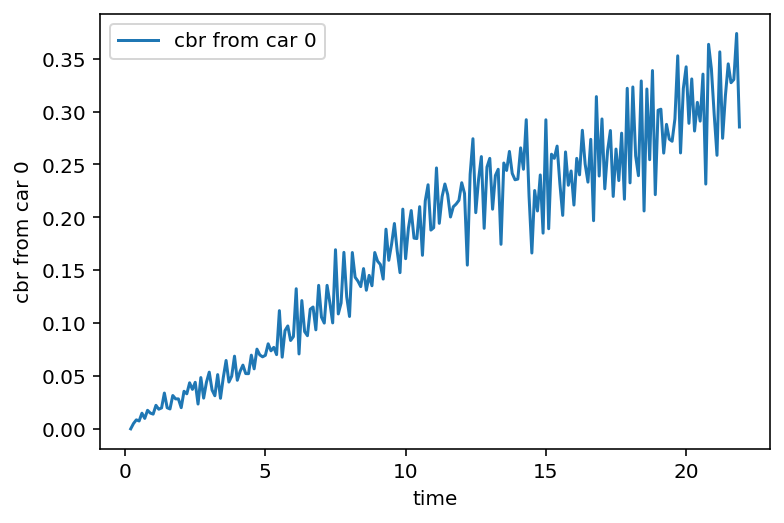

In [125]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr from car 0")
plt.legend()

In [126]:
cbr = vectors[(vectors.type == "vector") & (vectors.name == "CBR.VanetRx")]

In [127]:
vectimes = [string_of_floats_to_list_of_floats(c.vectime, ' ') for c in cbr.itertuples()]
vecvalues = [string_of_floats_to_list_of_floats(c.vecvalue, ' ') for c in cbr.itertuples()]

time_values = []

for i in range(len(vectimes)):
    time_values.append(list(zip(vectimes[i], vecvalues[i])))

In [128]:
times = vectimes[0]
weight_of_time = 0
values = 0
vecvalues = []

for t in times:
    for tv in time_values:
        for time, value in tv:
            if t == time:
                weight_of_time += 1
                values += value
                break

    vecvalues.append(values / 90)
    weight_of_time = 0
    values = 0

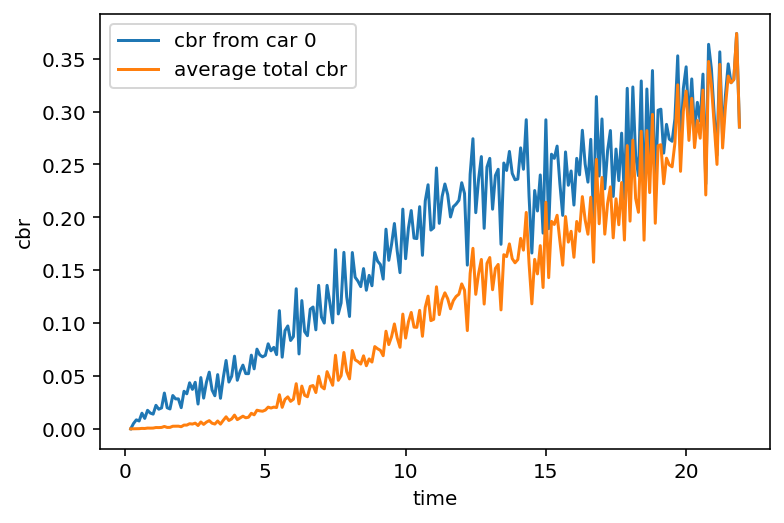

In [129]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr")
plt.plot(times, vecvalues, label="average total cbr")
plt.legend()
plt.show()

In [130]:
def add_car_cbr_to_plot(plt, time_values, i):
    tmp = [[ t for t, v in time_values[i] ],  [ v for t, v in time_values[i] ]]
    plt.plot(tmp[0], tmp[1], label=f"cbr from car {i}")

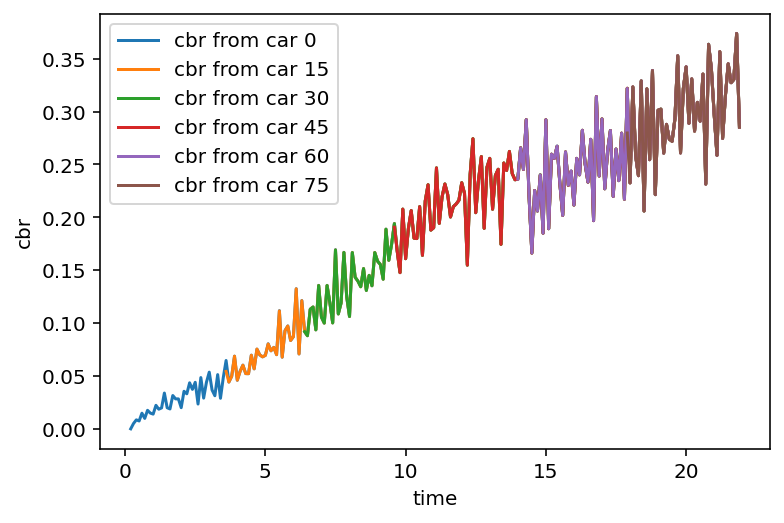

In [131]:
plt.xlabel("time")
plt.ylabel("cbr")
i = 0
#for tv in time_values:
#    tmp = [[ t for t, v in tv ],  [ v for t, v in tv ]] 
#    plt.plot(tmp[0], tmp[1], label=f"cbr from car {i}")
#    i += 1

add_car_cbr_to_plot(plt, time_values, 0)
add_car_cbr_to_plot(plt, time_values, 15)
add_car_cbr_to_plot(plt, time_values, 30)
add_car_cbr_to_plot(plt, time_values, 45)
add_car_cbr_to_plot(plt, time_values, 60)
add_car_cbr_to_plot(plt, time_values, 75)

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 144

scale_factor = 1

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.legend()
plt.show()